# Week 4

## Overview

This week is all about regression. Linear regression, multiple regression, and logistic regression. It is extremely lucky that we're learning about regression because this is the tool we'll need to counter a new threat facing SF. It turns out that _there is a **serial flasher** on the loose in the city_, exposing his naked body to the unsuspecting citizens at all hours of the day and night. The flasher has earned the nickname _the Red Baron_ because of his baboon-level red butt. 

But I was so excited by the optional KNN exercise from last week, that we'll include that as well. 

Here's a summary of the program:

 * Sune will address the class and focus on two things: Signing in to `peergrade.io` and how we like that the book is "from scratch", but that we generally recommend that you guys use tools out there (such as `scikit-learn`) when you solve the exercises.
 * As a call-back to last time, we start by explore KNN to study the patterns of Drugs, Prostitution, and Drunk driving across SF. So if you did the optional exercise last time, this one will be easy

Import and load data

In [6]:
# Imports
import numpy as np
import pandas as pd
from sklearn import neighbors
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

# Load data
data = pd.read_csv('data/SFPD_Incidents_-_from_1_January_2003.csv', sep=',')

## Part 1: KNN revisited

> _Exercise_: K-nearest-neighbors map.
> 
> The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from last week's exercises that the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map. 
> 
> * Begin by using `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). This will give you an idea of how the varioius crimes are distributed across the city.
> * Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out `scikit-learn`'s [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). If you end up using the latter (recommended), you may want to check out [this example](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html) to get a sense of the usage.
>   - You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. **But** do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?
>   - You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following. 
> * Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. 
> * Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, `K`.  


In [71]:
import geoplotlib
from geoplotlib.utils import BoundingBox

mask = (data.Y != 90)# & (data.Category == 'DRUG/NARCOTIC')

geodata = {"lat": data.loc[mask].Y.tolist(),
           "lon": data.loc[mask].X.tolist()}
geoplotlib.kde(geodata, bw=5, cut_below=1e-2);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();
#geoplotlib.show()


('smallest non-zero count', 3.5823932721920228e-09)
('max count:', 386.00174277466243)


## Scikit Knn

In [118]:
import random
mask = (data.Y != 90) & (data.Category.isin({'DRUG/NARCOTIC','DRIVING UNDER THE INFLUENCE', 'PROSTITUTION'}))

#knndata = random.sample(zip(zip(data.loc[mask].Y.tolist(),
#           data.loc[mask].X.tolist()),
#           data.loc[mask].Category.tolist()),50)
#X = [loc for loc, cat in knndata]
#target = [cat for loc, cat in knndata]

X = data.loc[mask][['X', 'Y']].values
target = data.loc[mask][['Category']].values

Drug/narcotics are overrepresented, thus getting many dots

In [121]:
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(X, target)

h = .002 # step size in the mesh
xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), h), np.arange(X[:,1].min(), X[:,1].max(), h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

geodata1 = {"lat": yy.ravel()[Z == 'DRUG/NARCOTIC'],
           "lon": xx.ravel()[Z == 'DRUG/NARCOTIC']}

geodata2 = {"lat": yy.ravel()[Z == 'DRIVING UNDER THE INFLUENCE'],
           "lon": xx.ravel()[Z == 'DRIVING UNDER THE INFLUENCE']}

geodata3 = {"lat": yy.ravel()[Z == 'PROSTITUTION'],
           "lon": xx.ravel()[Z == 'PROSTITUTION']}

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.dot(geodata1, color ='r', point_size=2);
geoplotlib.dot(geodata2, color ='g', point_size=2);
geoplotlib.dot(geodata3, color ='b', point_size=2);
geoplotlib.inline();

/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


## Part 2: Linear Regression (DSFS Chapter 14)

> _Reading_: Work through DSFS Chapter 14. 

Now it's time to watch a little Ole-video.

In [112]:
# Ole discusses Linear Regression
from IPython.display import YouTubeVideo
YouTubeVideo("_XK8JcpKsBw",width=600, height=338)

> _Exercises_: Just a few questions to check that you've read the material.
> 
> * What's the point of the error term $\epsilon_i$? (That one wasn't around when you learned how to figure out the slope and $y$ intercept of straight lines in high school).

The point of the error term $\epsilon_i$? is to contain the model residual (noise)

> * Why do you think Joel figures out how to find $\alpha$ and $\beta$ using gradient descent when we already know how to find the best values analytically?

Because we want to be able to use this method when it is not possible to find these values analytically. ex. adding regularization

## Part 3: Building an understanding of Multiple Regression and Logistic Regression

> _Reading_: Start by reading DSFS Chapter 15.

And let's watch another video to stimulate the visual part of your brain + get an expert's (Ole's) opinon on what's most important about Multiple regression.

In [113]:
# Ole explains Multiple Regression
YouTubeVideo("lLWJbCFoB30",width=600, height=338)

> _Exercises_: Now some questions for the text. Answer the following questions in your own words
>   
> * It's a requirement that the inputs of the model are linearly independent. Why is that important? Illustrate what can go wrong using a simple example.

It is important as it becomes impossible to estimate the parameters when they are linearly dependent. It is not a nessesity to model though, and regularization can then help estimating the parameters by minimizing parameter lenght.

> * What is _bootstrap_? When is it useful?

Bootstrapping is useful for achiving convergence.

In the book, bootstrapping is used as X fold cross validation

> * What is _regularization_? In what cases is reqularization important? Illustrate what can go wrong using a simple example.

Regularization targets to minimize the magnitude of the parameters by adding a cost to large parameters. This will help prevent overestimating linearly dependent variables

**Ridge penalisation** shrink parameters overall
**Lasso penalisation** shrinks forces parameters to be zero thus making it nice for learning sparse models (simple alternative to principal component analysis)

P values are assigned as what is the probability that the parameter is X given that the true value is 0. regularization brings the parameters closer to zero, 

> _Reading_: Go over DSFS Chapter 16 on Logistic regression

And then watch the corresponding video

In [114]:
# Ole explains Logistic Regression
YouTubeVideo("CuJQazbT6d0",width=600, height=338)

Transforming the linear model to a probabilistic two class classifier.
This can be done using the logistic function. As a maximum likelihood between two gaussians with a common variance.

Coral example
$$P(Recovery| depth, initial complexity) = \sigma (\beta_1 depth + \beta_2 {initial complexity} + \alpha) $$ 


## Part 4: Use regression models to help SFPD capture the dreaded _Red Baron_

You may remember from the _overview_ that we've found a serial flasher on the loose in SF. He has earned the nickname ***The Red Baron*** because of his characteristic red butt, which is as red as a baboon's behind.

There's a new dataset (internally called _the x-files_), which is too classified to be put on the SFOpenData webpage. This dataset contains a new crime type called `INDECENT EXPOSURE` and you can download it [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/x-files.csv). (_Psst: let's get real for a second ... in case you were in doubt, this dataset has been made up by your loving teaching staff_). The dataset contains all indecent exposure cases (SF has a lot of those), not just those caused by the Red baron. Some of the cases, however, carry the label `Red Baron` (whenever a victim has spotted his highly conspicuous Red Rump).

In this dataset, due to a data error, we don't have the districts, but we have GPS locations.

In [124]:
# load dataset
baron = pd.read_csv('data/the_red_baron_flasher.csv', sep=',')

In [138]:
Counter(baron.Resolution)

Counter({'NONE': 5015, 'RED BARON': 4985})

* Baron Sightings

In [140]:
mask = (baron.Y != 90)

geodata = {"lat": baron.loc[mask].Y.tolist(),
           "lon": baron.loc[mask].X.tolist()}
geoplotlib.dot(geodata, color='b');

mask = (baron.Y != 90) & (baron.Resolution == 'RED BARON')
geodata1 = {"lat": baron.loc[mask].Y.tolist(),
           "lon": baron.loc[mask].X.tolist()}
geoplotlib.dot(geodata1);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();
#geoplotlib.show()

> _Exercise_: Your first exercise is localize where the Red Baron. The idea is to use the crimes labeled `INDECENT EXPOSURE` figure out where the Red Baron tends to strike. Each case has a `Resolution` field: in case of the Red Baron was recognized, it is indicated in this field, otherwise it shows `NONE`.
> Use **logistic regression** to predict if we have the Red Baron or not provided we know the longitude and latitude of the crime.
> 
> * We will train our data to estimate the regression parameters and then validate the results by calculating performance measures on another chunk of the data. To achieve this, train your model using 80% of the data and then calculate regression performance on the rest 20%. Calculate accuracy, precision and recall to see how good our model is! (Note that the Red Baron appears only in later years, so avoid selecting the first 80% of the data, but pick random cases instead.). 
> 
>   Our input variables are the longitude and latitude of the cases, and output variables are whether the crime was committed by the Red Baron or not. Note that GPS coordinates have very low variance which can cause some trouble in the optimization. Try to rescale your training and validation sets into between 0 and 1 before performing the regression.
> * For the regression, you can use the code in the DSFS book (Chapters 14-16) for the regression, or the corresponding [logistic regression method](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) in the scikit-learn module. Note that you don't need to write all code for yourself, for example, scipy provides a convenience method for high performance optimization: [scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).
> * When you have the regression parameters, plot the cases along with the decision boundary (you don't need to worry about scaling the location variables, you can use the rescaled inputs)! Which district is that?
> * (Optional) Estimate how the regression parameters deviate by using bootstrapping. In this case, you can pick a small chunk of the data (500 cases for each output), run the regression on half of the selected data 100 times and then calculate the mean and standard deviation of the fit parameters.

Just to give you guys a sense of what you should be expecting, our performance values were:
* `accuracy`:  0.891218
* `precision`: 0.783191
* `recall`:    0.941435

And the rescaled coordinates and decision boundary looks something like this:

![the decision boundary](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/b.png)

# Using logistic regression to locate the red baron


In [191]:
# seperate in training and validation data sets
training = baron.sample(frac = 0.8)
validation = baron.loc[~baron.index.isin(training.index)]

/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


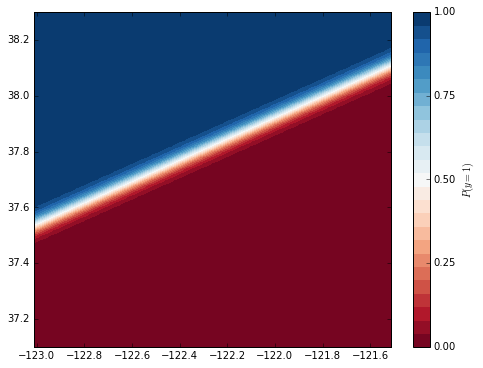

In [201]:
from sklearn import linear_model

X = training[['X', 'Y']].values
target = training[['Resolution']].values

h = .02 # step size in the mesh

logreg=linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, target)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])



It's a high stress situation, and the heat is coming down from the public officials to stop this red-assed scurge on the beautiful city of San Francisco. Right as the police force is beginning to disintegrate and morale is dwindeling, Police chief Suneman brings forward the idea that the Red Baron may not as random as previously assumed.

Chief Suneman's idea is that the Red Baron might pick the time of his attacks according to a pattern that we can detect using the powers of data science (with great power comes great responsibility).

If he's right, we can identify the time of the next attack, which will help us end this insanity once and for all. Well, let's see if he is right!

> Exercise: Predict the Red Baron's pattern.
> 
> 
> * Start from all cases having `Red Baron` in the resolution field and use the day of the week to predict the hour of the day when he is attacking, e.g. use **linear regression** to infer the hour of the day based on the weekday! Again, take 4/5 of the data for training and then calculate goodness of fit using $R^2$ on the rest 1/5. Don't forget to rescale your input variables! (Note 1: My goodness of fit after using the weekdays is only around 0.618). (Note 2: For multivariate regression, as always you can simply re-use the code in the DSFS book (Chapters 14-15) or scikit-learn).
> * Now, add the crime year as well to the input variables! Did the goodness of fit improve? (Note: Mine did to 0.809)
> * It is still very low. Inspired by a movie he once watched, Chief Suneman yells: "Let's add the longitude of the crimes as well!" Is your prediction getting better? (It should, to around 0.993)
> * Very nice! Why not add latitude as well? What do you find now?
> * (Optional) The gruff Deputy Chief Winther suspects that latitude has nothing to do with the time of crimes. Check this by estimating parameter deviations using the bootstrap method. What is the deviation of the coefficient for the latitude? Again, for bootstrap, you can use a small bit of the data (e.g., 500 crimes) to have a faster running time.

8000